In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    r"/content/drive/MyDrive/flower_multi_class/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r"/content/drive/MyDrive/flower_multi_class/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)



Found 767 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [ ]:
# Get the class indices from the training generator
class_indices = train_generator.class_indices

# Extract class names
class_names = list(class_indices.keys())

print("Class indices:", class_indices)
print("Class names:", class_names)


Class indices: {'rose': 0, 'sunflower': 1, 'tulip': 2, 'water_lily': 3}
Class names: ['rose', 'sunflower', 'tulip', 'water_lily']


In [ ]:
# Define a Sequential model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
24/24 [==============================] - 97s 4s/step - loss: 6.8177e-04 - accuracy: 1.0000 - val_loss: 1.0074 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 94s 4s/step - loss: 2.4558e-04 - accuracy: 1.0000 - val_loss: 0.9748 - val_accuracy: 0.5000
Epoch 3/10
24/24 [==============================] - 92s 4s/step - loss: 1.5435e-04 - accuracy: 1.0000 - val_loss: 0.9242 - val_accuracy: 0.5000
Epoch 4/10
24/24 [==============================] - 93s 4s/step - loss: 1.1951e-04 - accuracy: 1.0000 - val_loss: 0.9468 - val_accuracy: 0.5000
Epoch 5/10
24/24 [==============================] - 91s 4s/step - loss: 9.9182e-05 - accuracy: 1.0000 - val_loss: 0.9781 - val_accuracy: 0.5000
Epoch 6/10
24/24 [==============================] - 94s 4s/step - loss: 8.5671e-05 - accuracy: 1.0000 - val_loss: 0.9819 - val_accuracy: 0.5000
Epoch 7/10
24/24 [==============================] - 91s 4s/step - loss: 7.4610e-05 - accuracy: 1.0000 - val_loss: 0.9910 - val_accuracy:

In [ ]:
model.save('Flowers.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model('Flowers.h5')
print("Model Loaded")

Model Loaded


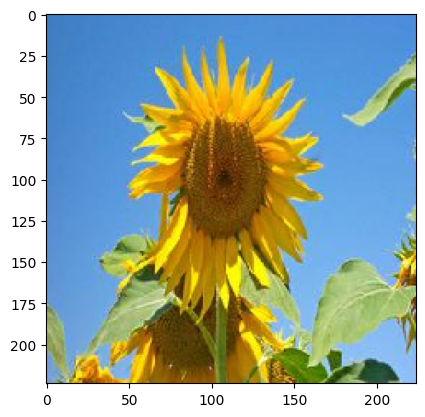

1/1 [==============================] - 0s 66ms/step
[[2.2744845e-17 1.0000000e+00 6.5148255e-23 5.0053761e-21]]


In [ ]:
# Load and view the image
from matplotlib import pyplot as plt
test_image_path = r"/content/drive/MyDrive/flower_multi_class/train/sunflower/5336298343_591fb07d45_c.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))

plt.imshow(img)
plt.axis()
plt.show()

#convert image into array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the pixel values


# Make predictions
prediction = model.predict(img_array)
# Print the prediction
print(prediction)

In [ ]:
#interprete the results
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 [==============================] - 0s 84ms/step
sunflower
